<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-Walrasian-Heterogeneous-Agent-Model" data-toc-modified-id="A-Walrasian-Heterogeneous-Agent-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>A Walrasian Heterogeneous Agent Model</a></span><ul class="toc-item"><li><span><a href="#Key-Learning-Points" data-toc-modified-id="Key-Learning-Points-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Key Learning Points</a></span><ul class="toc-item"><li><span><a href="#Economics" data-toc-modified-id="Economics-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Economics</a></span></li><li><span><a href="#Modelling/Computation" data-toc-modified-id="Modelling/Computation-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Modelling/Computation</a></span></li></ul></li><li><span><a href="#Environment" data-toc-modified-id="Environment-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Environment</a></span><ul class="toc-item"><li><span><a href="#Households" data-toc-modified-id="Households-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Households</a></span></li><li><span><a href="#Firms" data-toc-modified-id="Firms-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Firms</a></span></li><li><span><a href="#Stationary-equilibrium" data-toc-modified-id="Stationary-equilibrium-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Stationary equilibrium</a></span></li></ul></li><li><span><a href="#Class-implementation" data-toc-modified-id="Class-implementation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Class implementation</a></span></li><li><span><a href="#Note" data-toc-modified-id="Note-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Note</a></span></li><li><span><a href="#Partial-Equilibrium" data-toc-modified-id="Partial-Equilibrium-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Partial Equilibrium</a></span></li><li><span><a href="#General-Equilibrium" data-toc-modified-id="General-Equilibrium-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>General Equilibrium</a></span><ul class="toc-item"><li><span><a href="#Pseudocode-(stationary-equilibrium)" data-toc-modified-id="Pseudocode-(stationary-equilibrium)-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Pseudocode (stationary equilibrium)</a></span></li></ul></li><li><span><a href="#Inequality-measure" data-toc-modified-id="Inequality-measure-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Inequality measure</a></span></li></ul></li></ul></div>

# A Walrasian Heterogeneous Agent Model

by [MachinaFantasma](https://phantomachine.github.io/)


## Key Learning Points


### Economics

**A Theoretical Baseline**. Recall our lessons on *complete markets* (see LS, Ch.8, *Equilibrium with Complete Markets*). There we had:
* A world with ex-ante identical agents (same preferences and technologies) but ex-post heterogeneity in individual agents' risky incomes (hence, consumption risk)
* Walrasian markets (centralized trading environment)
* Complete state-contingent Arrow securities that can be traded to insure individuals' idionsyncratic risks
* All contractual promises are (assumed) enforceable

*Insurance and representative agent result*. The punchline was that in spite of individual (ex-post) heterogeneity in consumption opportunities, we have a perfect insurance through the market solution (i.e., competitive equilibrium). That is, because of the modelling ingredients listed above, the market solution correctly prices and eliminates all possible individuals' *idionsyncratic* risks to consumption.



In short, complete markets theory also rationalized a *representative agent outcome*: The competitive equilibrium appears as if everyone looks the same, as far as their economic (e.g., consumption) outcomes---and therefore welfare---is concerned. As a corrollary, in a complete markets world, the only uninsurable thing would be common (or aggregate) shocks to the economic environment (e.g., economy-wide fall in exogenous productivity or an exogenous cut in government spending). This forms the theoretical basis for representative agent models in the 1980s to the early 2000s (e.g., Real Business Cycle and New Keynesian models).



**A Wrinkle in the Baseline Perfect World**. Clearly, we don't see this in the real world. Instead we see wealth and consumption inequality. So why? 

Empiricists working on inequality have a rich set of documented findings using survey and administrative data on people's incomes and wealth. But we still need some structure, some model with clearly defined cause-and-effect mechanisms to provide a possible rationalization of these empirical regularities.

One way to break the benchmark result is to make our model markets incomplete. That is, agents' may not have access to a complete set of securities that span all possible individual contingencies. There are various way to model this:

1. Ad-hoc (exogenous) restrictions on set of tradable securities

2. Endogenous restrictions on otherwise complete securities markets:
    * Private information (an adverse selection problem)
    * Limited commitment to honoring contracts (a moral hazard problem)
    


We'll focus on the first in this notebook. The second class of problems fall under dynamic mechanism design (contracts). (For further reading, see Miao, Ch. 22 or Ljungqvist and Sargent, Ch. 20-22; and Kocherlakota's *The New Dynamic Public Finance*.)

### Modelling/Computation

We will apply the computational lessons we've learned thus far and put it all together here in this example:

1. *Infinite horizon stochastic dynamic programming*: This is applied to price-taking agents' ex-ante problem. Because agents are ex-ante indentical (in taste and technology), they will be solving for the same optimal Markovian *strategy*. They only differ is their *outcomes*.

2. *Simulating Markov chains*: We will apply this to generate random samples of an individual's lifetime realization of idiosyncratic (skill) shocks. Given that, we can construct their random outcomes in terms of allocations.

3. *Stationary distributions*: Using the Monte Carlo simulation outcomes, we can construct the aggregate distribution of an agent's asset holdings. A stable Markov process law of large numbers apply in this model: With large enough samples, the distribution of an agent's history of asset outcomes approximates the distribution of assets of the population of all agents in the long run. Intuitively, this is because the equilibrium agent behaves as a Markov process that, with time, wanders throughout the entire state space of asset positions. If every agent has that property (but have different outcomes at each point in time), then the frequency with which each agent visits every (measurable) subset of the state space in the long run should converge to the population measure over the same subsets. This is proven more formally in our lecture slides.

4. *Walrasian equilibrium*: Given a candidate stationary distribution of agents, we can calculate the integral of agent's labor and asset supplies to match them to an aggregate firm's demands for these inputs. A *stationary* recursive Walrasian equilibrium will select the appropriate pricing vector to clear these markets. This part is "new" in this exercise. We will use the [*bisection method*](https://en.wikipedia.org/wiki/Bisection_method) to model the hypothetical Walrasian auction process (i.e., *tâtonnement*).

We will also learn to compute some useful statistics for measuring inequality in the asset distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from BewleyAiyagari import Bewley_Aiyagari as bam

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

## Environment

Notation:

* $a \in X = [\underline{a}, \overline{a}]$: individual's non-state contingent claim (asset) that pays a unit of consumption in any state of the world. (Hence, exogenous incomplete markets model)

* $c > 0$: consumption

* $e \in S$: skill level of individual, where $S$ is a finite set

* Aggregate capital and labor (demanded): $K$ and $N$

* Relative prices of consumption, capital and labor: $(1, r, w)$

### Households


An individual agent's problem:

* Preference function: $\mathbb{E}\left(\sum_{t\geq 0} U(c_{t}) | (a_{t}, e_{t})\right)$, $U$ strictly increasing, strictly concave and differentiable everywhere.

* Constraint per period: 

    * Budget: $a_{t+1} + c_{t} = (1+r_{t})a_{t} + w_{t}e_{t}$
    
    * Borrowing limit or liquidity constraint (ad-hoc): $a_{+1} \geq \underline{a}$

* Skill level (exogenous): $e_{t} \sim \text{Markov}(\mu_{0}, P)$ (approximates a continuous AR(1) process)

Let $\overline{a}$ be arbitrarily large upper bound on assets, and, let
$$\Gamma(a,e) := \left\{ y \in \mathbb{R}: \underline{a} \leq y \leq \min \{(1+r)a+we, \overline{a} \} \right\}.$$

Optimization problem re-written as a Bellman functional:
$$
    v(a, e; r) = \max_{a_{+1} \in  \Gamma(a,e)} \left\{ U((1+r)a+we-a_{+1}) + \beta \sum_{e_{+1} \in S}P_{e, e_{+1}} v(a_{+1}, e_{+1}; r) \right\}
$$

Note:

* Each agent (an atom) on the population $[0,1]$ faces a random draw of $e$ at the start of each period before taking an action, independent of someone else. So this implies that even if agents have the same primitive descriptions of taste, they will be ex post differ in their wealth levels over the long run since their individual histories of states $(a,e)$ will be different. 

    * That is, we'll have a panel data set of people that will differ along the dimensions $(a,e)$!
    
    * If you think about it, this is a rather Rawlsian sort of experimental world: Everyone may enter the stage looking the same initially, but beyond the veil of ignorance (ex post realization of individual skill shocks over time) some will be in a better wealth position than some others.

* Given market relative prices of good, capital and labor $(1, r, w)$, solution for an agent currently named $(a,e)$ is a value function $(a,e) \mapsto v(a,e; r)$ and a decision function $(a,e) \mapsto g(a,e; r)$

* $v$ and $g$ depend on the (given) outcomes of $(w,r)$, and on the agent's income through $(a,e)$, just like the indirect utility function of your standard micro consumer problem

* We'll see in equilibrium, we can derive $w$ as a function of $r$ so we only need to track $r$ in terms of market clearing


### Firms

Firm's profit maximizing conditions:
* $r_{t} = F_{K}(K_{t}, N_{t}) - \delta$

* $w_{t} = F_{N}(K_{t}, N_{t})$



### Stationary equilibrium

This will be a vector of prices $(1, r, w)$ and saving and labor allocation function(s) $(g, N)$, such that

* Agents optimize (and derive their consumption demand and factor supply functions): $v$ and $g$

* Firms optimize (as described above)

* Markets clear (supply equals demand):

    * Labor: $\sum_{e} \mu_{\infty} e = N$, where $\mu_{\infty} = \mu_{0} \lim_{t \rightarrow \infty} P^{t}$ is the stationary distribution of agent skill types,
    
    * Capital: $\int_{X \times S} g(a,e; r) d\psi(a,e) = K$,
    
    where the stationary distribution function $\psi$ over agent types $(a,e)$ satisfies the fixed point condition:
    
    $$\psi(B) = \int_{X \times S} Q(a,e, B) d\psi(a,e),$$
    
    for every (Borel-measurable) event $B \in \mathcal{B}(X \times S)$. (Implicitly, $Q$ and therefore $\psi$ will depend on $r$.)


## Class implementation

Below we describe all the ingredients and methods we'll need and pack it all nicely into a class called ```Bewley_Aiyagari```.

This objected oriented approach to coding the model makes our code neat and easy to follow, as things will be described as sets of subsets of objects and methods. 

You can think of this as just like when you do math properly in terms of set notation, or, even when you do long proofs by considering a set of smaller results (Lemmata or Propositions) before arriving at the main Theorem that puts them all together.

## Note

Here we develop a refinement over the brute-force iteration-on-Bellman-operator algorithm. This (prove-ably) more efficient algorithm called Howard's policy improvement algorithm speeds up the solution. 

This is crucial as we'll be iteratively searching over candidate Walrasian equilibrium prices and recomputing agents' problems at each guess of the price vector $(1, r, w)$ until a stationary recursive competitive equilibrium attains.

The idea of this Howard policy-improvement algorithm is as follows:
1. Suppose the agent follows a given decision rule, $g_{n}$, given prices
2. Calculate her lifetime expected payoff function $v_{n}$ as a consequence of sticking to rule $g_{n}$
3. Given $v_{n}$ check if there exists a profitable deviation $g_{n+1}$ from $g_{n}$. 
4. If so, the value of following the new rule $g_{n+1}$ is $v_{n+1}$.
5. Reset $n \gets n+1$ and Repeat steps 2 to 4 until $g_{n+1} = g_{n} = g$.

That is, an optimal policy $g$ supporting a value function $v$, much be such that there is no incentive to deviate from it ever. This no-profitable-one-shot-deviation property is yet another incarnation of Bellman's Principle of Optimality.

(Game theory students, this algorithm is similar in concept to checking for subgame perfection in repeated and dynamic games.)

## Partial Equilibrium

Let's test drive this ``Bewley_Aiyagari`` class. Consider a partial equilibrium example. Suppose we fixed *some* market relative price of capital, $r$.

Below we parametrize the model and solve for a single agent's best response. 

In [2]:
# AR(1) shock process to individual skill/productivity
rho = 0.8
sigma = 0.2/np.sqrt(1.-rho**2)

# Instantiate model CLASS on these parameters
wham = bam(a_lb=0.0, a_ub=300., RHO=rho, SIGMA=sigma, NGRID_e=3)

# Fix arbitrary market relative price, note w = w(r)
r = wham.r_lb + 1e-2

The output is her value function $(a,e) \mapsto v(a,e; r)$ and her savings function $(a,e) \mapsto g(a,e; r)$, as best response to market prices $(1, r, w(r))$. 

In [3]:
v, g = wham.Howard(r, display_howard=True)

[ =============== ] 100.00% 12/12, error1 = 0.00005    

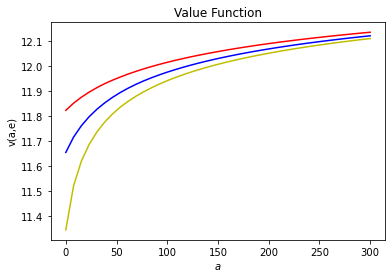

In [4]:
plt.figure()
plt.plot(wham.asset_grid, v[:,0],'-y', 
         wham.asset_grid, v[:,1], '-b', 
         wham.asset_grid, v[:,2], '-r')
plt.title("Value Function")
plt.xlabel("$a$")
plt.ylabel("v(a,e)")
plt.show()

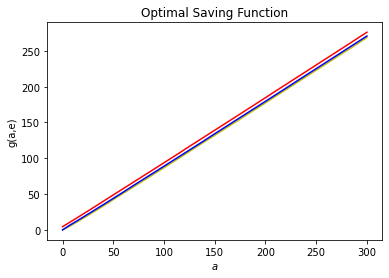

In [5]:
plt.figure()
plt.plot(wham.asset_grid, g[:,0],'-y', 
         wham.asset_grid, g[:,1], '-b', 
         wham.asset_grid, g[:,2], '-r')
plt.title("Optimal Saving Function")
plt.xlabel("$a$")
plt.ylabel("g(a,e)")
plt.show()

## General Equilibrium

Now we consider the complete model where relatives prices are determined in a Walrasian equilibrium. We focus on the equilibrium concept of *stationary recursive competitive equilibrium*, or, *stationary equilibrium* in short. This was defined formally at the top.

A stationary equilibrium here requires that allocations and prices are such that the resulting aggregate state of the economy (i.e., the endogeneous distribution over *agent types*) remains constant overtime. Within this equilibrium, agents are still moving around their individual state spaces stochastically, but the aggregate joint distribution over agents' asset and skill levels stays the same. It turns out that to pin down this equilibrium, the aggregate distribution is sufficiently characterized by its mean statistic, or equivalently, by its market clearing relative price(s).

**Applications.** Using this equilibrium concept, one can study how
* incomplete markets results in ex-post heterogeneity in agent outcomes;

* borrowing constraints result in precautionary savings motives;

* the economy can inefficient have too much capital in the long run (thus providing a case for taxing capital income); and

With enough additional frictions, we may have a more serious structural model (i.e., a candidate causal mechanism) to help us decipher the dynamics of individual wealth and aggregrate observed inequality in wealth in the data.

The literature has extended this model to also study non-stationary equilibria, by introducing aggregate shocks. In such settings, we'll have versions of a heterogeneous agent business cycle model.

Below, we demo how the *stationary recursive competitive equilibrium* can be found, using the ``Bewley_Aiyagari`` class we've designed above.

### Pseudocode (stationary equilibrium)

1. Guess initial vector of relative prices, $r \equiv (1, r, w(r))$.

2. ```Bewley_Aiyagari.Howard()```: Given $r$, solve agents' dynamic programs. Get:

    * Value function $(a,e) \mapsto v(a,e; r)$
    
    * Savings function $(a,e) \mapsto g(a,e; r)$
      
3. ```Bewley_Aiyagari.MonteCarloSimulation()```: Given $g$ and Markov chain process $(\mu_0, P)$, construct candidate stationary distribution of agents, $\psi(a,e; r)$.

4. ```Bewley_Aiyagari.Tatonnement()```: Given $\psi$, check if market clearing.

    * Capital demand equals supply, $K = \int g(a,e; r) \psi(a,e; r)$, implied in $r = F_{K}(K,N) - \delta$.
    
    * Labour supply equals demand, $\int (1 \times e) d\psi(a,e; r) = N$.
      
   If $r$ such that markets are not clearing, update $r \gets r'$.

6. Repeat 2 to 4 until $K \approx \int g(a,e; r) d\psi(a,e; r)$.

In [6]:
# AR(1) shock process to individual skill/productivity
rho = 0.8
sigma = 0.2/np.sqrt(1.-rho**2)

# Instantiate model CLASS on these parameters
wham = bam(a_lb=0.0, a_ub=300., RHO=rho, SIGMA=sigma, NGRID_e=3)

In [7]:
# Initial guess of market equilibrium
r = -0.04389

# Iterate on price vector until markets clear
print("Iteration \t error_r \t error_K \t\t r")
for iter_price in range(wham.MAXITER_price):
    # Check from other end too
    if iter_price == 1:
        r = wham.r_lb + 1e-2
    # Implied aggregate demand K_demand from firm's FOC w.r.t. K
    K_demand = wham.CobbDouglas_netmpk_inverse(r)
    # Given r, work out agent's problem (supply of a's)
    value, policy = wham.Howard(r, display_howard=False)    
    # Approx distro over population a's by limiting distro of an agent's history
    a_path, e_path = wham.MonteCarloSimulation(policy, a_init=K_demand/wham.N)
    # Implied aggregate supply of K - this is just mean of the simulated distro
    K_supply = wham.AssetDistributionStats(a_path)[0]
    # Tâtonnement - Bisection algorithm as "Walrasian auctioneer"
    r_update, error_r = wham.Tatonnement(K_supply, r)
    r = r_update
    # Stopping rule - market clearing
    excess_demand_K = K_supply - K_demand
    error_K = np.absolute(excess_demand_K)/K_demand
    # Print stats
    print("\n\t%i \t %6.5f \t %6.5f \t %6.5f" %(iter_price, error_r, error_K, r))
    if (error_K < wham.TOL_K):
        print("\nStationary Equilibrium found!")
        break

Iteration 	 error_r 	 error_K 		 r

	0 	 0.03764 	 0.85483 	 -0.00625

	1 	 0.03845 	 0.97146 	 -0.03155

	2 	 0.03128 	 0.75615 	 -0.00027

	3 	 0.00220 	 0.09076 	 0.00194

	4 	 0.03605 	 0.00797 	 -0.03412

Stationary Equilibrium found!


In [8]:
K_supply

11.83678183337165

In [9]:
K_demand

11.743231380066124

## Inequality measure

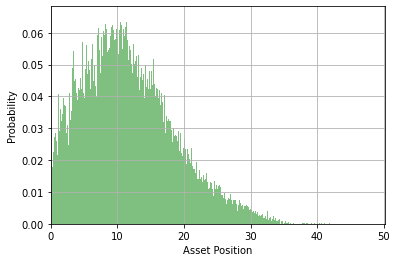

In [10]:
# the histogram of the data
freq, bins = wham.ShowDistro(a_path)

In [11]:
# Gini coefficient of distribution
wham.Gini(a_path)

0.32745704237282514

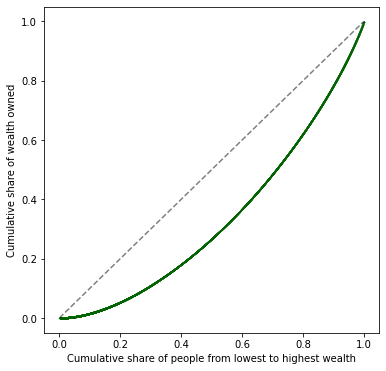

In [12]:
# Lorenz curve depiction
wham.LorenzCurve(a_path)